<u><h1><CENTER> ML-DEC-MAJOR PROJECT

We will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Size of training set: 6,019 records

Size of test set: 1,234 records

<b>FEATURES</b>:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

<b><h3>IMPORTING TRAIN AND TEST DATA

In [121]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
from forex_python.converter import CurrencyRates
from collections import defaultdict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [122]:
import pandas
d = pandas.read_excel('Data_Train.xlsx')
print("TRAIN DATA:")
d

TRAIN DATA:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [123]:
test = pandas.read_excel('Data_Test.xlsx')
print("TEST DATA:")
test

TEST DATA:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [124]:
test_big = test.copy()

In [125]:
import re
"""for i in range(len(df)):
    df.loc[i,'Mileage'] = re.search(r'\d+', df.loc[i,'Mileage'] ).group()"""
pattern = re.compile('^(\\S*)\\s')
d['Mileage']=d['Mileage'].str.extract(pattern)
d['Engine']=d['Engine'].str.extract(pattern)
d['Power']=d['Power'].str.extract(pattern)
test['Mileage']=test['Mileage'].str.extract(pattern)
test['Engine']=test['Engine'].str.extract(pattern)
test['Power']=test['Power'].str.extract(pattern)


In [126]:
df = d.iloc[0:4001]
validation =  d.iloc[4001:]
df.reset_index(drop=True,inplace=True)
validation.reset_index(drop=True,inplace=True)
validation

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Accord 2.4 Inspire M/T,Mumbai,2012,42000,Petrol,Manual,First,9.8,2354,180,5.0,NaN,6.25
1,Hyundai i20 Sportz 1.4 CRDi,Bangalore,2013,60000,Diesel,Manual,First,21.9,1396,88.76,5.0,NaN,5.45
2,Jaguar XF 2.2 Litre Luxury,Mumbai,2018,3000,Diesel,Automatic,First,16.36,2179,187.7,5.0,NaN,52.50
3,Hyundai Verna 1.6 SX VTVT (O) AT,Mumbai,2013,44000,Petrol,Automatic,First,17.1,1591,121.4,5.0,NaN,5.60
4,Honda City i VTEC VX Option,Kolkata,2014,37000,Petrol,Manual,First,17.4,1497,117.3,5.0,NaN,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88 Lakh,4.75
2014,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,NaN,4.00
2015,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,NaN,2.90
2016,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,NaN,2.65


In [127]:
z = pd.DataFrame(df['Name'])
y = z['Name'].str.split()
k=list()
for i in y:
    k.append(i[0])
new = pandas.Series(k)
df['Name'] = new


z = pandas.DataFrame(validation['Name'])
y = z['Name'].str.split()
k=list()
for i in y:
    k.append(i[0])
new = pandas.Series(k)
validation['Name'] = new

z = pandas.DataFrame(test['Name'])
y = z['Name'].str.split()
k=list()
for i in y:
    k.append(i[0])
new = pandas.Series(k)
test['Name'] = new

In [128]:
d.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                False
dtype: bool

In [129]:
print(df['Engine'].isnull().sum())
print(df['Power'].isnull().sum())
print(df['Seats'].isnull().sum())
print(df['Mileage'].isnull().sum())
df.drop(df[df['Mileage'].isnull()].index, inplace=True)
df.drop(df[df['Engine'].isnull()].index, inplace=True)
df.drop(df[df['Power'].isnull()].index, inplace=True)
df.drop(df[df['Seats'].isnull()].index, inplace=True)

25
25
30
0


In [130]:
print(d['New_Price'].isnull().sum())
df.drop(columns=['New_Price'],inplace=True)
validation.drop(columns=['New_Price'],inplace=True)
test.drop(columns=['New_Price'],inplace=True)

5195


In [131]:
d["Year"] = pd.to_datetime(d["Year"]).dt.year
test['Year'] = pd.to_datetime(test["Year"]).dt.year
validation['Year'] = pd.to_datetime(validation["Year"]).dt.year

In [132]:
d.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Diesel    2146
Petrol    1776
CNG         41
LPG          8
Name: Fuel_Type, dtype: int64


,Fuel_Type,price_mean,count
0,CNG,3.449024,41
1,Diesel,12.681076,2146
2,Petrol,5.708215,1776
3,Diesel,12.681076,2146
4,Diesel,12.681076,2146
...,...,...,...
3996,Diesel,12.681076,2146
3997,Diesel,12.681076,2146
3998,Diesel,12.681076,2146
3999,Petrol,5.708215,1776


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

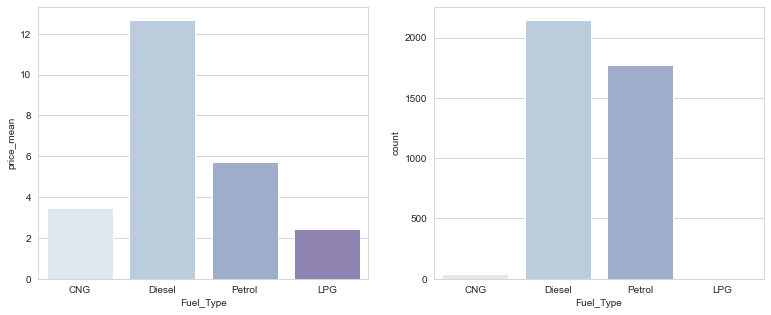

In [133]:
sns.set_style("whitegrid")
x=pd.DataFrame()
x['Fuel_Type'] = df['Fuel_Type']
x['price_mean'] = df['Fuel_Type'].map(df.groupby('Fuel_Type')['Price'].mean())
x['count'] = df['Fuel_Type'].map(df['Fuel_Type'].value_counts())
print(df['Fuel_Type'].value_counts())
#x = x.drop_duplicates(keep='first')
display(x)
sns.set_palette('BuPu')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Fuel_Type'],x['price_mean'],ax=ax[0][0])
sns.barplot(x['Fuel_Type'],x['count'])

Diesel    2146
Petrol    1776
CNG         41
LPG          8
Name: Fuel_Type, dtype: int64


,Fuel_Type,price_median,price_mode
0,CNG,3.25,3.25
1,Diesel,7.75,3.50
2,Petrol,4.15,3.25
3,Diesel,7.75,3.50
4,Diesel,7.75,3.50
...,...,...,...
3996,Diesel,7.75,3.50
3997,Diesel,7.75,3.50
3998,Diesel,7.75,3.50
3999,Petrol,4.15,3.25


<AxesSubplot:xlabel='Fuel_Type', ylabel='price_mode'>

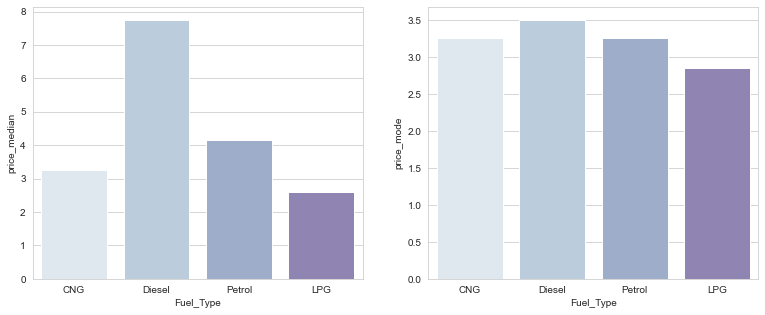

In [134]:
x=pd.DataFrame()
x['Fuel_Type'] = df['Fuel_Type']
x['price_median'] = df['Fuel_Type'].map(df.groupby('Fuel_Type')['Price'].median())
x['price_mode'] = df['Fuel_Type'].map(df.groupby('Fuel_Type')['Price'].apply(lambda y: list(y.mode())[0]))
print(df['Fuel_Type'].value_counts())
display(x)
sns.set_palette('BuPu')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Fuel_Type'],x['price_median'],ax=ax[0][0])
sns.barplot(x['Fuel_Type'],x['price_mode'])

In [72]:
x = pd.DataFrame()
x['Price'] = df['Price']
x['Fuel_Type'] = df['Fuel_Type']
x['Fuel_Type'] = x['Fuel_Type'].map(x.groupby('Fuel_Type')['Price'].mean())
x['Fuel_Type'].mean()

9.446534877864655

In [135]:
fuel_dict1 =(df.groupby('Fuel_Type')['Price'].mean()).to_dict()

def def_value():
    return 9.43
fuel_dict = defaultdict(def_value)
for i,j in fuel_dict1.items():
    fuel_dict[i] = j
df['Fuel_Type'] = df['Fuel_Type'].map(fuel_dict)
validation['Fuel_Type'] = validation['Fuel_Type'].map(fuel_dict)
test['Fuel_Type']=test['Fuel_Type'].map(fuel_dict)

In [136]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,3.449024,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,12.681076,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,5.708215,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,12.681076,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,12.681076,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,BMW,Delhi,2012,76000,12.681076,Automatic,First,16.07,1995,181,4.0,8.75
3997,Hyundai,Kolkata,2015,27000,12.681076,Manual,First,21.19,1396,88.73,5.0,5.99
3998,Mahindra,Chennai,2005,120000,12.681076,Manual,Second,12.7,2609,116.6,8.0,2.90
3999,Audi,Hyderabad,2012,125000,5.708215,Automatic,First,10.5,3197,null,0.0,18.00


12.681076    2146
5.708215     1776
3.449024       41
2.425000        8
Name: Fuel_Type, dtype: int64


,Transmission,price_mean,count
0,Manual,5.337415,2839
1,Manual,5.337415,2839
2,Manual,5.337415,2839
3,Manual,5.337415,2839
4,Automatic,19.752005,1132
...,...,...,...
3996,Automatic,19.752005,1132
3997,Manual,5.337415,2839
3998,Manual,5.337415,2839
3999,Automatic,19.752005,1132


<AxesSubplot:xlabel='Transmission', ylabel='count'>

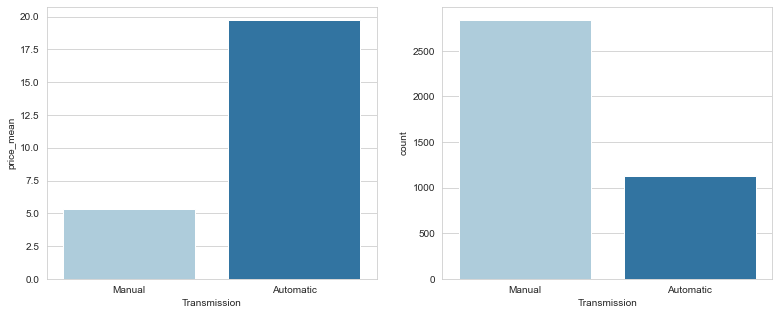

In [137]:
sns.set_style("whitegrid")
x=pd.DataFrame()
x['Transmission'] = df['Transmission']
x['price_mean'] = df['Transmission'].map(df.groupby('Transmission')['Price'].mean())
x['count'] = df['Transmission'].map(df['Transmission'].value_counts())
print(df['Fuel_Type'].value_counts())
display(x)
sns.set_palette('Paired')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Transmission'],x['price_mean'],ax=ax[0][0])
sns.barplot(x['Transmission'],x['count'])

In [138]:
trans_dict = {'Manual':0,'Automatic':1}
df['Transmission'] = df['Transmission'].map(trans_dict)
validation['Transmission'] = validation['Transmission'].map(trans_dict)
test['Transmission']=test['Transmission'].map(trans_dict)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,3.449024,0,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,12.681076,0,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,5.708215,0,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,12.681076,0,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,12.681076,1,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,BMW,Delhi,2012,76000,12.681076,1,First,16.07,1995,181,4.0,8.75
3997,Hyundai,Kolkata,2015,27000,12.681076,0,First,21.19,1396,88.73,5.0,5.99
3998,Mahindra,Chennai,2005,120000,12.681076,0,Second,12.7,2609,116.6,8.0,2.90
3999,Audi,Hyderabad,2012,125000,5.708215,1,First,10.5,3197,null,0.0,18.00


First             3255
Second             628
Third               82
Fourth & Above       6
Name: Owner_Type, dtype: int64


,Owner_Type,price_mean,count
0,First,5.90,3255
1,First,5.90,3255
2,First,5.90,3255
3,First,5.90,3255
4,Second,4.45,628
...,...,...,...
3996,First,5.90,3255
3997,First,5.90,3255
3998,Second,4.45,628
3999,First,5.90,3255


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

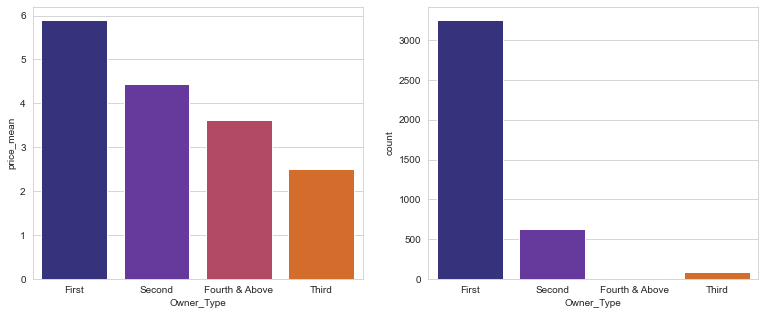

In [139]:
sns.set_style("whitegrid")
x=pd.DataFrame()
x['Owner_Type'] = df['Owner_Type']
x['price_mean'] = df['Owner_Type'].map(df.groupby('Owner_Type')['Price'].median())
x['count'] = df['Owner_Type'].map(df['Owner_Type'].value_counts())
print(df['Owner_Type'].value_counts())
display(x)
sns.set_palette('CMRmap')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Owner_Type'],x['price_mean'],ax=ax[0][0])
sns.barplot(x['Owner_Type'],x['count'])

First             3255
Second             628
Third               82
Fourth & Above       6
Name: Owner_Type, dtype: int64


,Owner_Type,price_median,price_mode
0,First,5.90,4.5
1,First,5.90,4.5
2,First,5.90,4.5
3,First,5.90,4.5
4,Second,4.45,3.5
...,...,...,...
3996,First,5.90,4.5
3997,First,5.90,4.5
3998,Second,4.45,3.5
3999,First,5.90,4.5


<AxesSubplot:xlabel='Owner_Type', ylabel='price_mode'>

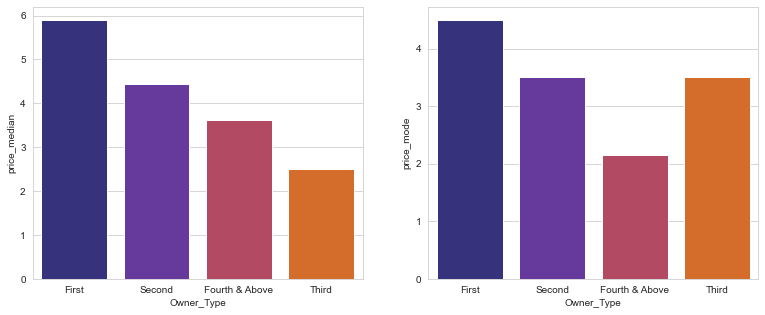

In [140]:
x=pd.DataFrame()
x['Owner_Type'] = df['Owner_Type']
x['price_median'] = df['Owner_Type'].map(df.groupby('Owner_Type')['Price'].median())
x['price_mode'] = df['Owner_Type'].map(df.groupby('Owner_Type')['Price'].apply(lambda y: list(y.mode())[0]))
print(df['Owner_Type'].value_counts())
display(x)
sns.set_palette('CMRmap')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Owner_Type'],x['price_median'],ax=ax[0][0])
sns.barplot(x['Owner_Type'],x['price_mode'])

In [141]:
x = pd.DataFrame()
x['Price'] = df['Price']
x['Owner_Type'] = df['Owner_Type']
x['Owner_Type'] = x['Owner_Type'].map(x.groupby('Owner_Type')['Price'].mean())
x['Owner_Type'].mean()

9.446534877864506

In [142]:
owner_dict1 =(df.groupby('Owner_Type')['Price'].mean()).to_dict()
def def_value():
    return 9.45
fuel_dict = defaultdict(def_value)
for i,j in owner_dict1.items():
    fuel_dict[i] = j
df['Owner_Type'] = df['Owner_Type'].map(fuel_dict)
validation['Owner_Type'] = validation['Owner_Type'].map(fuel_dict)
test['Owner_Type']=test['Owner_Type'].map(fuel_dict)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,3.449024,0,9.927960,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,12.681076,0,9.927960,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,5.708215,0,9.927960,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,12.681076,0,9.927960,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,12.681076,1,7.716449,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,BMW,Delhi,2012,76000,12.681076,1,9.927960,16.07,1995,181,4.0,8.75
3997,Hyundai,Kolkata,2015,27000,12.681076,0,9.927960,21.19,1396,88.73,5.0,5.99
3998,Mahindra,Chennai,2005,120000,12.681076,0,7.716449,12.7,2609,116.6,8.0,2.90
3999,Audi,Hyderabad,2012,125000,5.708215,1,9.927960,10.5,3197,null,0.0,18.00


In [143]:
df.drop(df[df['Power']=='null'].index,inplace=True)
df.drop(df[df['Seats']=='null'].index,inplace=True)
df['Mileage'] = df['Mileage'].astype(float)
df['Power'] = df['Power'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [144]:
validation['Power'].fillna(df['Power'].mean())
test['Power'].fillna(df['Power'].mean())
validation['Power'].unique()

array(['180', '88.76', '187.7', '121.4', '117.3', '82.85', '86.8',
       '163.5', '66.1', nan, '46.3', '140', '74', '184', '85.80', '178',
       '138.03', '126.32', '108.45', '75', '67.1', '121.3', '183', '152',
       '89.84', '204', '70', '68', '126.2', '73.94', '100.6', '272',
       '103.52', '110', '67.04', '103.6', '215', '118', '66', '138',
       '88.73', '78', '261.5', '174.33', '147.5', '444', '91.1', '174.3',
       '123.37', '81.80', '190', '107.3', '81.83', '171', '68.05', '80',
       'null', '86.7', '255', '78.9', '73.9', '100', '125', '141', '67',
       '88.5', '241.4', '175.67', '103.3', '81.86', '258', '83.8',
       '177.46', '175.56', '55.2', '177.5', '116.3', '53', '138.08',
       '120.7', '98.59', '174.5', '83.14', '210', '69.01', '73.75',
       '73.74', '157.7', '98.6', '171.5', '254.8', '120', '53.64',
       '126.24', '85.8', '83.1', '126.3', '300', '73', '88.50', '103.2',
       '102', '79.4', '77', '132', '103.5', '47.3', '62.1', '203', '241',
       '64

In [145]:
validation['Fuel_Type'].unique()

array([ 5.70821509, 12.68107642,  3.44902439,  9.43      ,  2.425     ])

In [146]:
validation['Power'].fillna(df['Power'].mean(), inplace=True)
validation['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
validation['Engine'].fillna(df['Engine'].mean(), inplace=True)
validation['Seats'].fillna(df['Seats'].mean(), inplace=True)

test['Power'].fillna(df['Power'].mean(), inplace=True)
test['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
test['Engine'].fillna(df['Engine'].mean(), inplace=True)
test['Seats'].fillna(df['Seats'].mean(), inplace=True)


In [147]:
validation[validation['Power'] == 'null'] = df['Power'].mean()
test[test['Power'] == 'null'] = df['Power'].mean()

In [148]:
validation['Power'] = validation['Power'].astype(float)
test['Power'] = test['Power'].astype(float)
validation['Engine'] = validation['Engine'].astype(float)
test['Engine'] = test['Engine'].astype(float)

In [149]:
validation

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Honda,Mumbai,1970.0,42000.0,5.708215,0.0,9.927960,9.8,2354.0,180.00,5.0,6.25
1,Hyundai,Bangalore,1970.0,60000.0,12.681076,0.0,9.927960,21.9,1396.0,88.76,5.0,5.45
2,Jaguar,Mumbai,1970.0,3000.0,12.681076,1.0,9.927960,16.36,2179.0,187.70,5.0,52.50
3,Hyundai,Mumbai,1970.0,44000.0,5.708215,1.0,9.927960,17.1,1591.0,121.40,5.0,5.60
4,Honda,Kolkata,1970.0,37000.0,5.708215,0.0,9.927960,17.4,1497.0,117.30,5.0,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Maruti,Delhi,1970.0,27365.0,12.681076,0.0,9.927960,28.4,1248.0,74.00,5.0,4.75
2014,Hyundai,Jaipur,1970.0,100000.0,12.681076,0.0,9.927960,24.4,1120.0,71.00,5.0,4.00
2015,Mahindra,Jaipur,1970.0,55000.0,12.681076,0.0,7.716449,14.0,2498.0,112.00,8.0,2.90
2016,Maruti,Kolkata,1970.0,46000.0,5.708215,0.0,9.927960,18.9,998.0,67.10,5.0,2.65


<AxesSubplot:xlabel='Seats', ylabel='Price'>

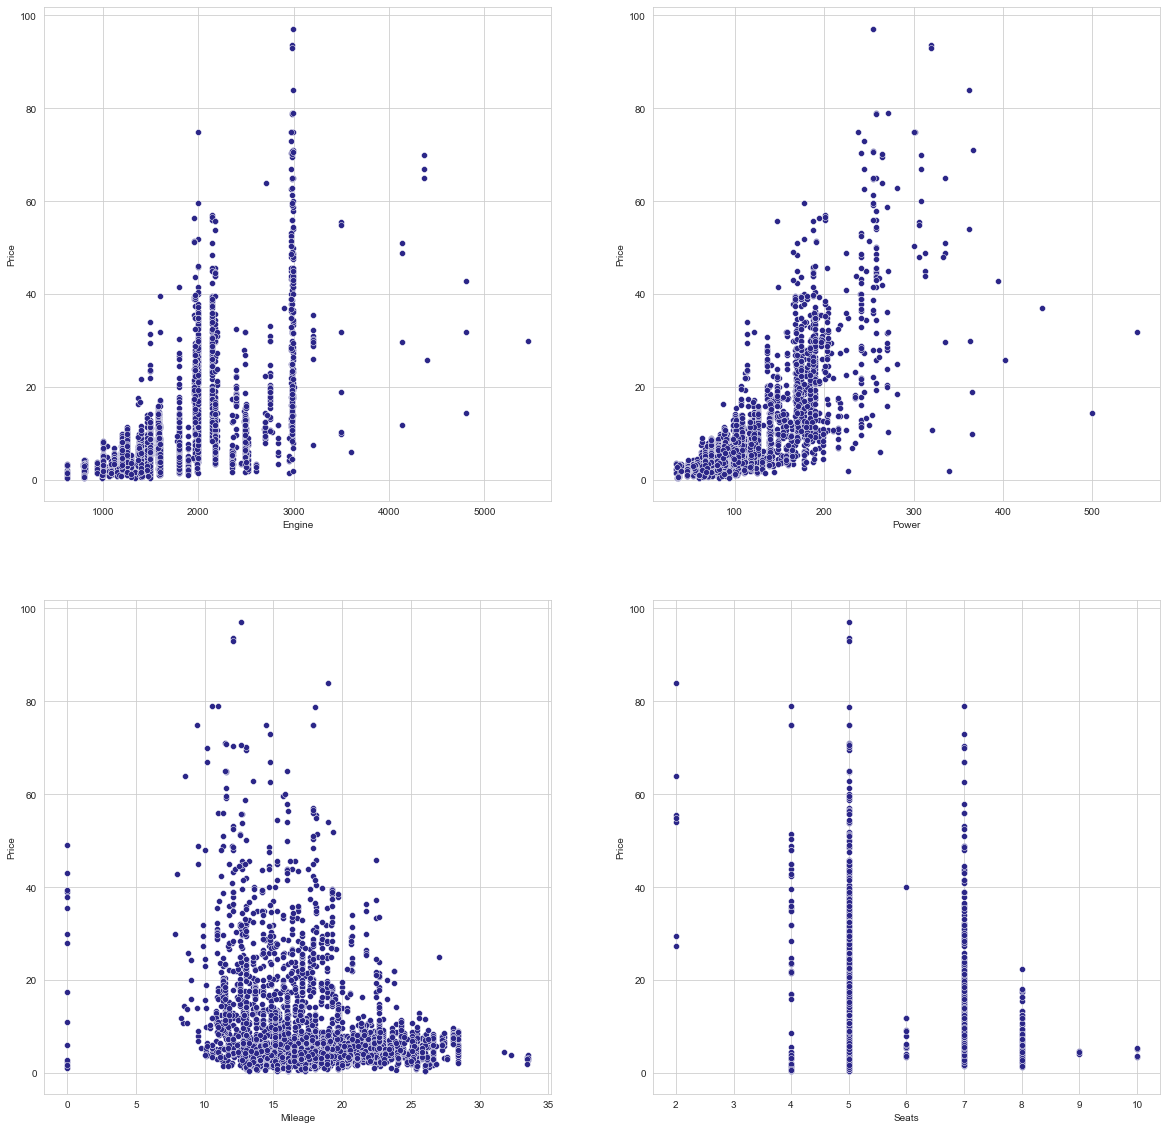

In [150]:
fig,ax=plt.subplots(2,2,figsize=(20,20),squeeze=False)
x=pd.DataFrame()
sns.set_palette(sns.light_palette('purple',reverse=True))
x['Price'] = df['Price']
x['Engine'] = df['Engine']
x['Power'] = df['Power']
x['Mileage'] = df['Mileage']
x['Seats'] = df['Seats']
sns.scatterplot(x['Engine'],x['Price'],ax=ax[0][0])
sns.scatterplot(x['Power'],x['Price'],ax=ax[0][1])
sns.scatterplot(x['Mileage'],x['Price'],ax=ax[1][0])
sns.scatterplot(x['Seats'],x['Price'],ax=ax[1][1])


5.0     3248
7.0      469
8.0       81
4.0       67
6.0       17
2.0        7
10.0       4
9.0        3
Name: Seats, dtype: int64


,Seats,price_mean,count
0,5.0,8.600339,3248
1,5.0,8.600339,3248
2,5.0,8.600339,3248
3,7.0,14.614542,469
4,5.0,8.600339,3248
...,...,...,...
3995,5.0,8.600339,3248
3996,4.0,19.022239,67
3997,5.0,8.600339,3248
3998,8.0,7.400864,81


<AxesSubplot:xlabel='Seats', ylabel='count'>

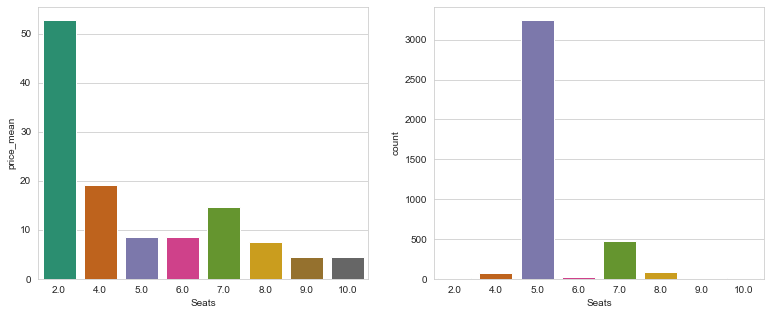

In [151]:
sns.set_style("whitegrid")
x=pd.DataFrame()
x['Seats'] = df['Seats']
x['price_mean'] = df['Seats'].map(df.groupby('Seats')['Price'].mean())
x['count'] = df['Seats'].map(df['Seats'].value_counts())
print(df['Seats'].value_counts())
display(x)
sns.set_palette('Dark2')
fig,ax=plt.subplots(1,2,figsize=(13,5),squeeze=False)
sns.barplot(x['Seats'],x['price_mean'],ax=ax[0][0])
sns.barplot(x['Seats'],x['count'])

In [152]:
x = pd.DataFrame()
x['Price'] = df['Price']
x['Seats'] = df['Seats']
x['Seats'] = x['Seats'].map(x.groupby('Seats')['Price'].mean())
x['Seats'].mean()

9.550354209446194

In [153]:
seat_dict1 =(df.groupby('Seats')['Price'].mean()).to_dict()
def def_value():
    return 9.55
seat_dict = defaultdict(def_value)
for i,j in seat_dict1.items():
    seat_dict[i] = j
df['Seats'] = df['Seats'].map(seat_dict)
validation['Seats'] = validation['Seats'].map(seat_dict)
test['Seats']=test['Seats'].map(seat_dict)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,3.449024,0,9.927960,26.60,998.0,58.16,8.600339,1.75
1,Hyundai,Pune,2015,41000,12.681076,0,9.927960,19.67,1582.0,126.20,8.600339,12.50
2,Honda,Chennai,2011,46000,5.708215,0,9.927960,18.20,1199.0,88.70,8.600339,4.50
3,Maruti,Chennai,2012,87000,12.681076,0,9.927960,20.77,1248.0,88.76,14.614542,6.00
4,Audi,Coimbatore,2013,40670,12.681076,1,7.716449,15.20,1968.0,140.80,8.600339,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Hyundai,Pune,2011,54000,5.708215,0,9.927960,17.00,1197.0,80.00,8.600339,3.20
3996,BMW,Delhi,2012,76000,12.681076,1,9.927960,16.07,1995.0,181.00,19.022239,8.75
3997,Hyundai,Kolkata,2015,27000,12.681076,0,9.927960,21.19,1396.0,88.73,8.600339,5.99
3998,Mahindra,Chennai,2005,120000,12.681076,0,7.716449,12.70,2609.0,116.60,7.400864,2.90


<AxesSubplot:xlabel='Engine', ylabel='Density'>

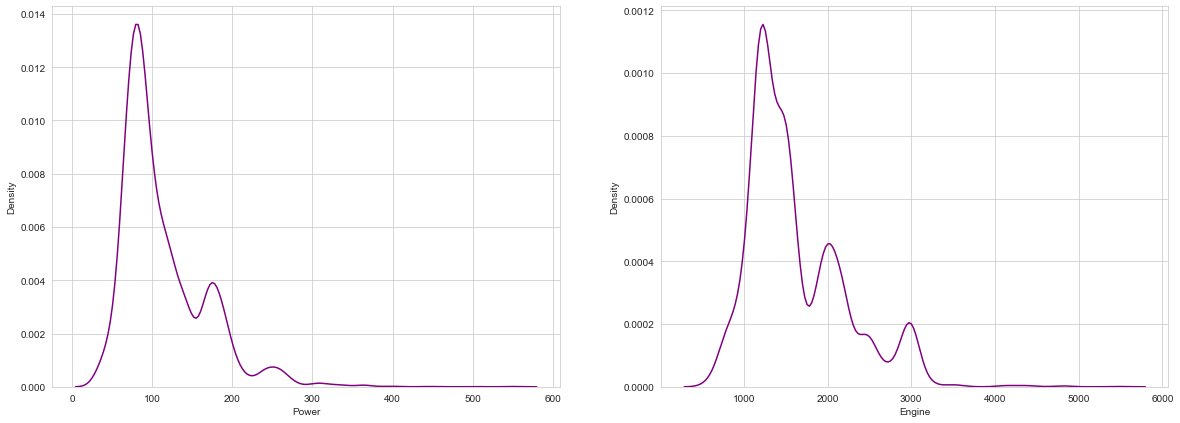

In [154]:
fig,ax=plt.subplots(1,2,figsize=(20,7),squeeze=False)

sns.kdeplot(df['Power'],ax=ax[0][0],color='purple')
#df['Power'] = np.log(df['Power'])
#sns.kdeplot(df['Power'],ax=ax[0][1],color='red')

sns.kdeplot(df['Engine'],ax=ax[0][1],color='purple')
#df['Engine'] = np.log(df['Engine'])
#sns.kdeplot(df['Engine'],ax=ax[1][1],color='red')

In [155]:
transformer = FunctionTransformer(np.log1p)
transformer.fit(df['Power'])

df['Power'] = transformer.transform(df['Power'])
test['Power'] = transformer.transform(test['Power'])
validation['Power'] = transformer.transform(validation['Power'])

In [157]:
transformer = FunctionTransformer(np.log1p)
transformer.fit(df['Engine'])

df['Engine'] = transformer.transform(df['Engine'])
test['Engine'] = transformer.transform(test['Engine'])
validation['Engine'] = transformer.transform(validation['Engine'])

<AxesSubplot:xlabel='Engine', ylabel='Density'>

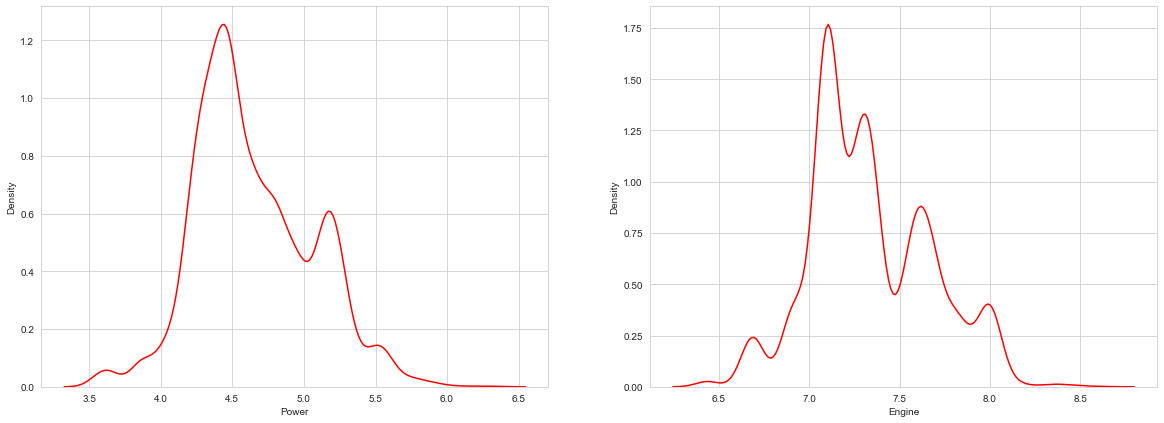

In [158]:
fig,ax=plt.subplots(1,2,figsize=(20,7),squeeze=False)
sns.kdeplot(df['Power'],ax=ax[0][0],color='red')
sns.kdeplot(df['Engine'],ax=ax[0][1],color='red')

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

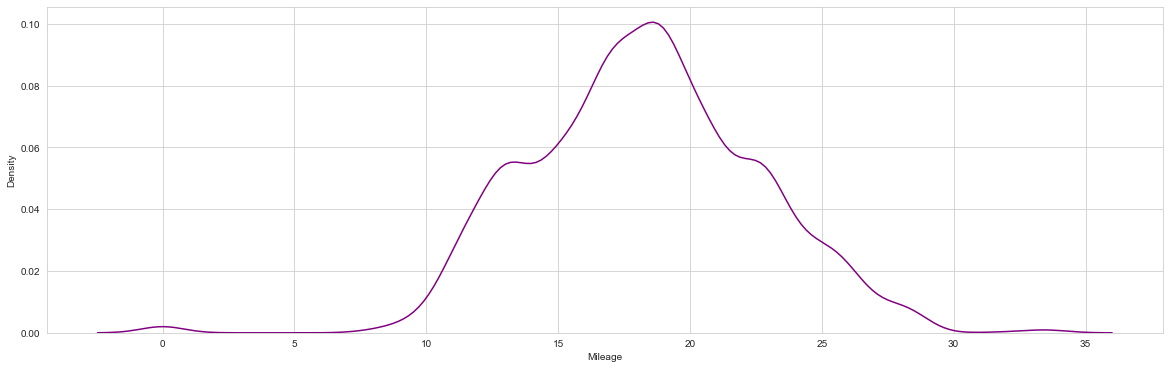

In [159]:
fig,ax=plt.subplots(1,1,figsize=(20,6),squeeze=False)
sns.kdeplot(df['Mileage'],ax=ax[0][0],color='purple')

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

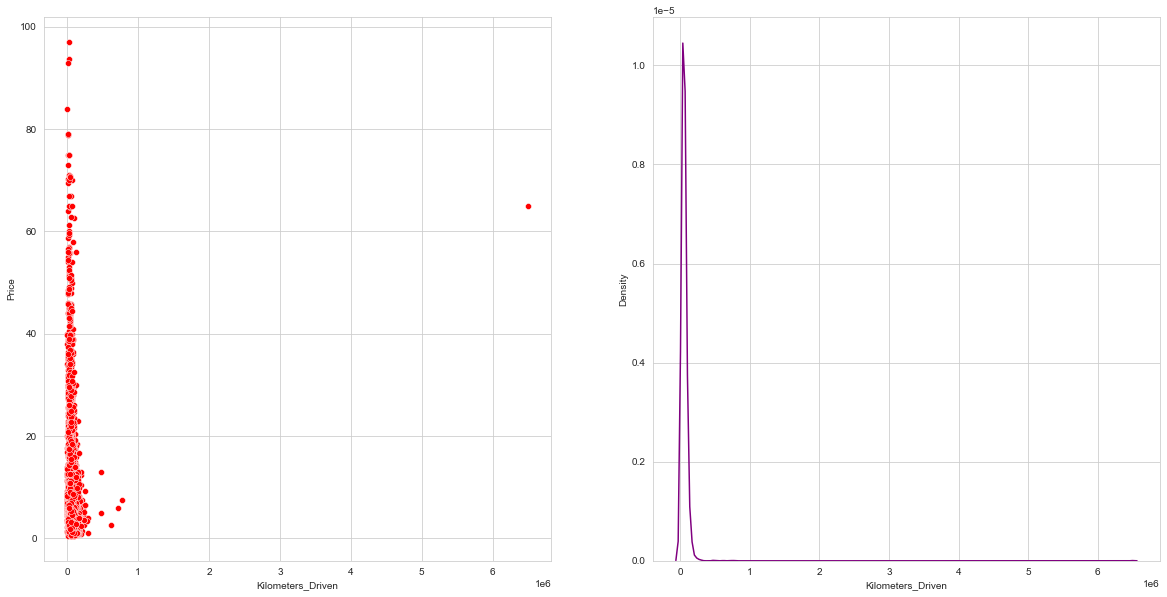

In [160]:
fig,ax=plt.subplots(1,2,figsize=(20,10),squeeze=False)
sns.scatterplot(df['Kilometers_Driven'],df['Price'], ax = ax[0][0], color='red')
sns.kdeplot(df['Kilometers_Driven'],ax=ax[0][1],color='purple')

In [161]:
transformer = FunctionTransformer(np.log1p)
transformer.fit(df['Kilometers_Driven'])

df['Kilometers_Driven'] = transformer.transform(df['Kilometers_Driven'])
test['Kilometers_Driven'] = transformer.transform(test['Kilometers_Driven'])
validation['Kilometers_Driven'] = transformer.transform(validation['Kilometers_Driven'])

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

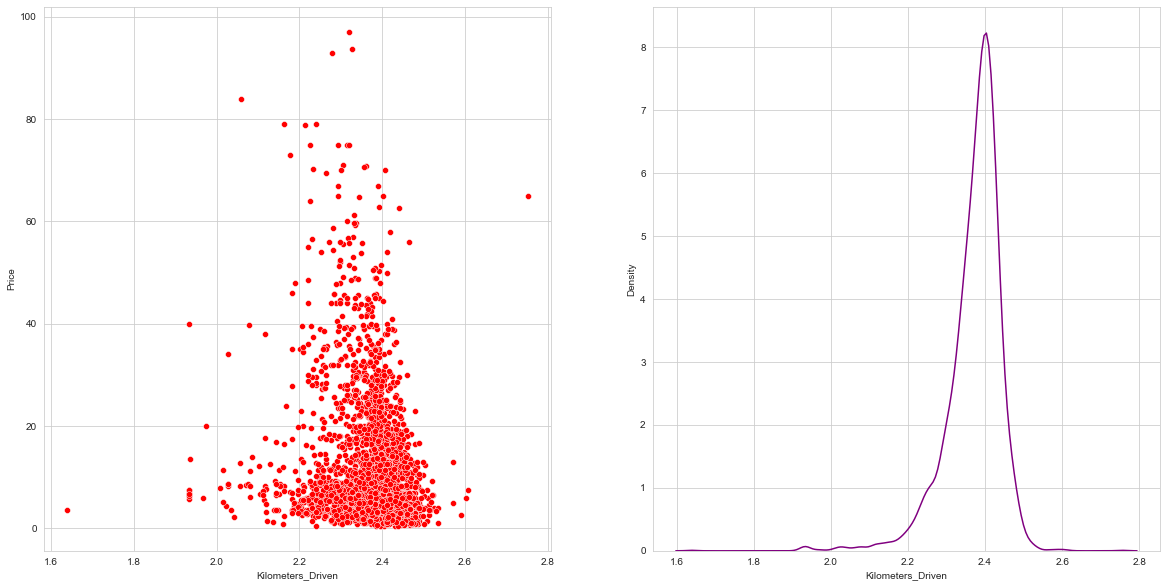

In [162]:
fig,ax=plt.subplots(1,2,figsize=(20,10),squeeze=False)
df['Kilometers_Driven'] = np.log(df['Kilometers_Driven'])
sns.scatterplot(df['Kilometers_Driven'],df['Price'], ax = ax[0][0], color='red')
sns.kdeplot(df['Kilometers_Driven'],ax=ax[0][1],color='purple')

Mumbai        520
Hyderabad     477
Coimbatore    421
Kochi         419
Pune          396
Kolkata       360
Delhi         359
Chennai       297
Jaipur        270
Bangalore     228
Ahmedabad     149
Name: Location, dtype: int64


[[]]

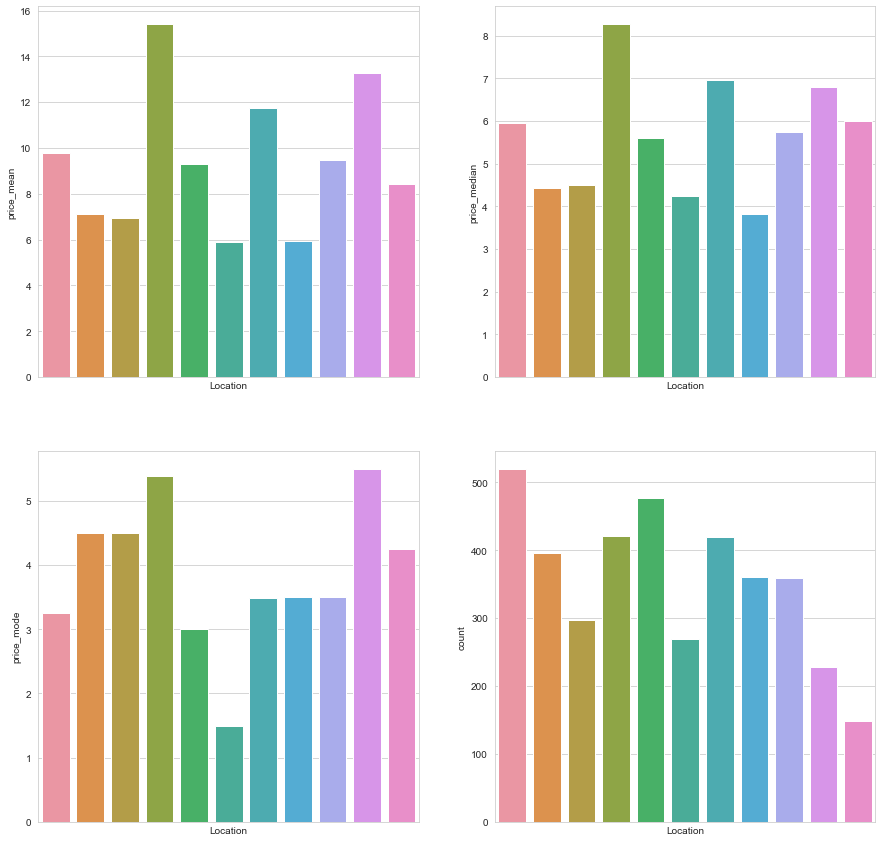

In [163]:
fig,ax=plt.subplots(2,2,figsize=(15,15),squeeze=False)

sns.set_style("whitegrid")
x=pd.DataFrame()
x['Location'] = df['Location']
x['price_mean'] = df['Location'].map(df.groupby('Location')['Price'].mean())
x['price_median'] = df['Location'].map(df.groupby('Location')['Price'].median())
x['price_mode'] = x['Location'].map(df.groupby('Location')['Price'].apply(lambda y: list(y.mode())[0])) 
x['count'] = df['Location'].map(df['Location'].value_counts())
print(df['Location'].value_counts())
sns.set_palette('CMRmap_r')
g1 = sns.barplot(x['Location'],x['price_mean'],ax=ax[0][0])
g2 = sns.barplot(x['Location'],x['price_median'], ax=ax[0][1])
g3 = sns.barplot(x['Location'],x['price_mode'],ax=ax[1][0])
g4 = sns.barplot(x['Location'],x['count'], ax=ax[1][1])
g1.set(xticks=[])
g2.set(xticks=[])
g3.set(xticks=[])
g4.set(xticks=[])

In [164]:
x = pd.DataFrame()
x['Price'] = df['Price']
x['Location'] = df['Location']
x['Location'] = x['Location'].map(x.groupby('Location')['Price'].mean())
x['Location'].mean()

9.550354209445866

In [165]:
location_dict1 =(df.groupby('Location')['Price'].mean()).to_dict()
def def_value():
    return 9.55
location_dict = defaultdict(def_value)
for i,j in location_dict1.items():
    location_dict[i] = j
df['Location'] = df['Location'].map(location_dict)
validation['Location'] = validation['Location'].map(location_dict)
test['Location']=test['Location'].map(location_dict)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,9.771058,2010,2.414523,3.449024,0,9.927960,26.60,6.906755,4.080246,8.600339,1.75
1,Hyundai,7.123434,2015,2.362866,12.681076,0,9.927960,19.67,7.367077,4.845761,8.600339,12.50
2,Honda,6.934007,2011,2.373642,5.708215,0,9.927960,18.20,7.090077,4.496471,8.600339,4.50
3,Maruti,6.934007,2012,2.431301,12.681076,0,9.927960,20.77,7.130099,4.497139,14.614542,6.00
4,Audi,15.408836,2013,2.362105,12.681076,1,7.716449,15.20,7.585281,4.954418,8.600339,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Hyundai,7.123434,2011,2.388465,5.708215,0,9.927960,17.00,7.088409,4.394449,8.600339,3.20
3996,BMW,9.454735,2012,2.419346,12.681076,1,9.927960,16.07,7.598900,5.204007,19.022239,8.75
3997,Hyundai,5.937167,2015,2.322743,12.681076,0,9.927960,21.19,7.242082,4.496805,8.600339,5.99
3998,Mahindra,6.934007,2005,2.459183,12.681076,0,7.716449,12.70,7.867106,4.767289,7.400864,2.90


,Name,price_mean,price_median,price_mode,count
0,Maruti,4.602748,4.20,4.25,797
1,Hyundai,5.347049,4.65,4.50,698
2,Honda,5.491730,4.94,3.25,393
3,Maruti,4.602748,4.20,4.25,797
4,Audi,25.239038,23.16,14.50,156
...,...,...,...,...,...
3995,Hyundai,5.347049,4.65,4.50,698
3996,BMW,24.667283,19.86,19.50,173
3997,Hyundai,5.347049,4.65,4.50,698
3998,Mahindra,8.156984,7.77,5.50,189


[[]]

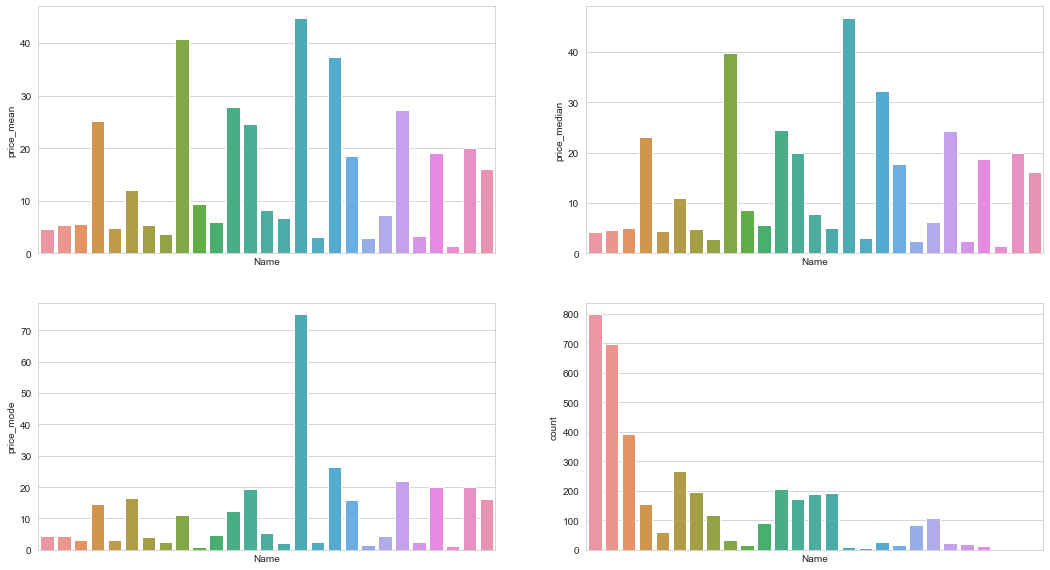

In [166]:
fig,ax=plt.subplots(2,2,figsize=(18,10),squeeze=False)
sns.set_style("whitegrid")
x=pd.DataFrame()
x['Name'] = df['Name']
x['price_mean'] = df['Name'].map(df.groupby('Name')['Price'].mean())
x['price_median'] = df['Name'].map(df.groupby('Name')['Price'].median())
x['price_mode'] = x['Name'].map(df.groupby('Name')['Price'].apply(lambda y: list(y.mode())[0])) 
x['count'] = df['Name'].map(df['Name'].value_counts())
display(x)
sns.set_palette('CMRmap')

g = sns.barplot(x['Name'],x['price_mean'],ax=ax[0][0])
g.set(xticks=[])
d = sns.barplot(x['Name'],x['price_median'], ax=ax[0][1])
d.set(xticks=[])
g = sns.barplot(x['Name'],x['price_mode'],ax=ax[1][0])
g.set(xticks=[])
d = sns.barplot(x['Name'],x['count'], ax=ax[1][1])
d.set(xticks=[])

In [167]:
x = pd.DataFrame()
x['Price'] = df['Price']
x['Name'] = df['Name']
x['Name'] = x['Name'].map(x.groupby('Name')['Price'].mean())
x['Name'].mean()

9.550354209445734

In [168]:
name_dict1 =(df.groupby('Name')['Price'].mean()).to_dict()
def def_value():
    return 9.55
name_dict = defaultdict(def_value)
for i,j in name_dict1.items():
    name_dict[i] = j
df['Name'] = df['Name'].map(name_dict)
validation['Name'] = validation['Name'].map(name_dict)
test['Name']=test['Name'].map(name_dict)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,4.602748,9.771058,2010,2.414523,3.449024,0,9.927960,26.60,6.906755,4.080246,8.600339,1.75
1,5.347049,7.123434,2015,2.362866,12.681076,0,9.927960,19.67,7.367077,4.845761,8.600339,12.50
2,5.491730,6.934007,2011,2.373642,5.708215,0,9.927960,18.20,7.090077,4.496471,8.600339,4.50
3,4.602748,6.934007,2012,2.431301,12.681076,0,9.927960,20.77,7.130099,4.497139,14.614542,6.00
4,25.239038,15.408836,2013,2.362105,12.681076,1,7.716449,15.20,7.585281,4.954418,8.600339,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5.347049,7.123434,2011,2.388465,5.708215,0,9.927960,17.00,7.088409,4.394449,8.600339,3.20
3996,24.667283,9.454735,2012,2.419346,12.681076,1,9.927960,16.07,7.598900,5.204007,19.022239,8.75
3997,5.347049,5.937167,2015,2.322743,12.681076,0,9.927960,21.19,7.242082,4.496805,8.600339,5.99
3998,8.156984,6.934007,2005,2.459183,12.681076,0,7.716449,12.70,7.867106,4.767289,7.400864,2.90


In [169]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,4.602748,9.771058,2010,2.414523,3.449024,0,9.927960,26.60,6.906755,4.080246,8.600339,1.75
1,5.347049,7.123434,2015,2.362866,12.681076,0,9.927960,19.67,7.367077,4.845761,8.600339,12.50
2,5.491730,6.934007,2011,2.373642,5.708215,0,9.927960,18.20,7.090077,4.496471,8.600339,4.50
3,4.602748,6.934007,2012,2.431301,12.681076,0,9.927960,20.77,7.130099,4.497139,14.614542,6.00
4,25.239038,15.408836,2013,2.362105,12.681076,1,7.716449,15.20,7.585281,4.954418,8.600339,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5.347049,7.123434,2011,2.388465,5.708215,0,9.927960,17.00,7.088409,4.394449,8.600339,3.20
3996,24.667283,9.454735,2012,2.419346,12.681076,1,9.927960,16.07,7.598900,5.204007,19.022239,8.75
3997,5.347049,5.937167,2015,2.322743,12.681076,0,9.927960,21.19,7.242082,4.496805,8.600339,5.99
3998,8.156984,6.934007,2005,2.459183,12.681076,0,7.716449,12.70,7.867106,4.767289,7.400864,2.90


In [570]:
"""from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
df['Fuel_Type']= le_Fuel_Type.fit_transform(df['Fuel_Type'])
df['Transmission']=le_Transmission.fit_transform(df['Transmission'])
df['Owner_Type']=le_Owner_Type.fit_transform(df['Owner_Type'])
df['Name']=le_Brand_Name.fit_transform(df['Name'])


validation['Fuel_Type']= le_Fuel_Type.fit_transform(validation['Fuel_Type'])
validation['Transmission']=le_Transmission.fit_transform(validation['Transmission'])
validation['Owner_Type']=le_Owner_Type.fit_transform(validation['Owner_Type'])
validation['Name']=le_Brand_Name.fit_transform(validation['Name'])

test['Fuel_Type']= le_Fuel_Type.fit_transform(test['Fuel_Type'])
test['Transmission']=le_Transmission.fit_transform(test['Transmission'])
test['Owner_Type']=le_Owner_Type.fit_transform(test['Owner_Type'])
test['Name']=le_Brand_Name.fit_transform(test['Name'])"""

"from sklearn.preprocessing import LabelEncoder\nle_Fuel_Type=LabelEncoder()\nle_Transmission=LabelEncoder()\nle_Owner_Type=LabelEncoder()\nle_Brand_Name=LabelEncoder()\ndf['Fuel_Type']= le_Fuel_Type.fit_transform(df['Fuel_Type'])\ndf['Transmission']=le_Transmission.fit_transform(df['Transmission'])\ndf['Owner_Type']=le_Owner_Type.fit_transform(df['Owner_Type'])\ndf['Name']=le_Brand_Name.fit_transform(df['Name'])\n\n\nvalidation['Fuel_Type']= le_Fuel_Type.fit_transform(validation['Fuel_Type'])\nvalidation['Transmission']=le_Transmission.fit_transform(validation['Transmission'])\nvalidation['Owner_Type']=le_Owner_Type.fit_transform(validation['Owner_Type'])\nvalidation['Name']=le_Brand_Name.fit_transform(validation['Name'])\n\ntest['Fuel_Type']= le_Fuel_Type.fit_transform(test['Fuel_Type'])\ntest['Transmission']=le_Transmission.fit_transform(test['Transmission'])\ntest['Owner_Type']=le_Owner_Type.fit_transform(test['Owner_Type'])\ntest['Name']=le_Brand_Name.fit_transform(test['Name'])"

In [170]:
validation['Fuel_Type'].unique()

array([  5.70821509,  12.68107642, 112.83853311,   3.44902439,
         9.43      ,   2.425     ])

<AxesSubplot:xlabel='Year', ylabel='Price'>

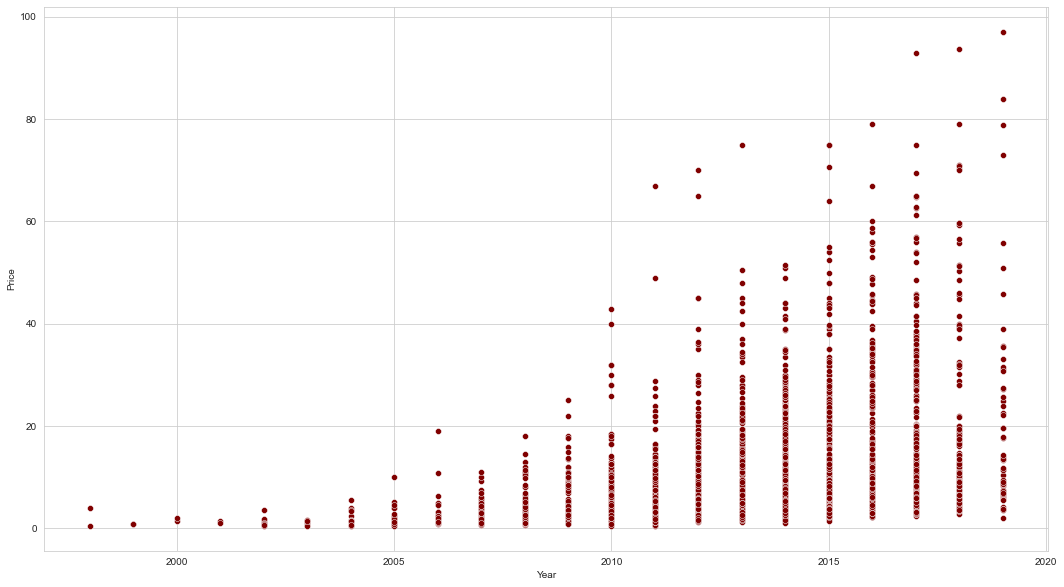

In [171]:
fig,ax=plt.subplots(1,1,figsize=(18,10),squeeze=False)
sns.scatterplot(df['Year'],df['Price'], color='maroon')

In [172]:
df.corr()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.155579,0.037231,-0.032685,0.316673,0.659765,-0.020054,-0.403744,0.633699,0.724538,0.135295,0.770835
Location,0.155579,1.000000,0.270721,-0.084625,0.017312,0.183409,0.079206,-0.090121,0.122681,0.171595,0.040193,0.262953
Year,0.037231,0.270721,1.000000,-0.474758,0.108278,0.096120,0.392977,0.272375,-0.041370,0.067005,0.061021,0.323213
Kilometers_Driven,-0.032685,-0.084625,-0.474758,1.000000,0.237992,-0.095058,-0.197532,-0.108776,0.163997,0.032718,-0.019634,-0.183433
Fuel_Type,0.316673,0.017312,0.108278,0.237992,1.000000,0.142102,0.046891,0.092809,0.492472,0.351143,0.125250,0.324597
Transmission,0.659765,0.183409,0.096120,-0.095058,0.142102,1.000000,-0.000019,-0.362859,0.500755,0.638263,0.093228,0.593777
Owner_Type,-0.020054,0.079206,0.392977,-0.197532,0.046891,-0.000019,1.000000,0.150764,-0.053809,-0.005092,0.004358,0.099450
Mileage,-0.403744,-0.090121,0.272375,-0.108776,0.092809,-0.362859,0.150764,1.000000,-0.620417,-0.544601,-0.200540,-0.334873
Engine,0.633699,0.122681,-0.041370,0.163997,0.492472,0.500755,-0.053809,-0.620417,1.000000,0.880893,0.288315,0.618683
Power,0.724538,0.171595,0.067005,0.032718,0.351143,0.638263,-0.005092,-0.544601,0.880893,1.000000,0.217802,0.713691


In [173]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
X_train = df[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

11

In [174]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [175]:
X_train_T = X_train.T
print(X_train_T.duplicated().sum())
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


<AxesSubplot:>

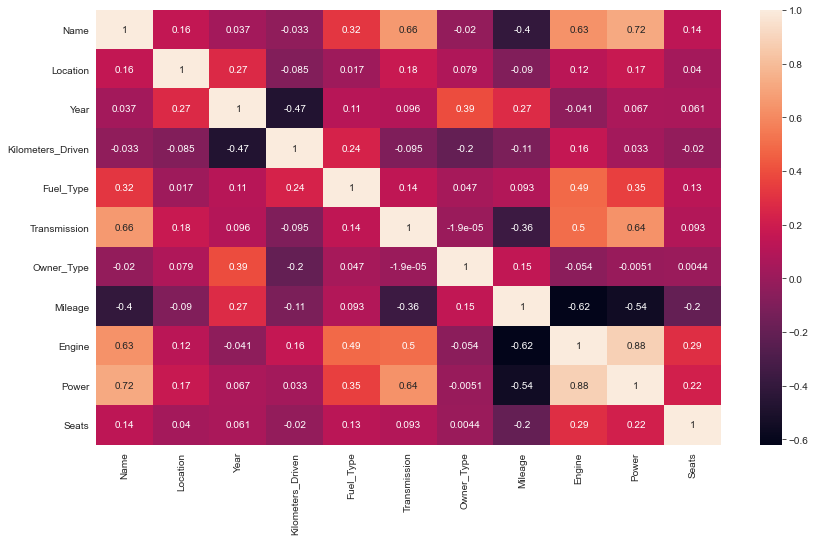

In [176]:
corr=X_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [177]:
def handling_correlation(df,threshold=0.8):
    corr_features = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)
handling_correlation(X_train.copy(),0.7)

['Power']

In [178]:
#Sequential Forward Selection(sfs) with Linear Regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

i=11
while i!=0:
    sfs = SFS(LinearRegression(),
          k_features=i,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
    sfs.fit(df[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']],df['Price'])
    print(sfs.k_feature_names_ )
    i=i-1

('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Mileage', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Power', 'Seats')
('Name', 'Year', 'Power', 'Seats')
('Name', 'Year', 'Power')
('Name', 'Year')
('Name',)


In [179]:
#Sequential Forward Selection(sfs) with Random Forest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

i=11
while i!=0:
    sfs = SFS(RandomForestRegressor(),
          k_features=i,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
    sfs.fit(df[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']],df['Price'])
    print(sfs.k_feature_names_ )
    i=i-1

('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Owner_Type', 'Mileage', 'Engine', 'Power')
('Name', 'Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Mileage', 'Engine', 'Power')
('Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Power')
('Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power')
('Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Power')
('Name', 'Year', 'Kilometers_Driven', 'Power')
('Year', 'Kilometers_Driven', 'Power')
('Kilometers_Driven', 'Power')
('Power',)


In [180]:
#Sequential Forward Selection(sfs) with SVR
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVR

i=11
while i!=0:
    sfs = SFS(SVR(),
          k_features=i,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
    sfs.fit(df[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']],df['Price'])
    print(sfs.k_feature_names_ )
    i=i-1

('Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Owner_Type', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Power', 'Seats')
('Name', 'Location', 'Kilometers_Driven', 'Power')
('Name', 'Kilometers_Driven', 'Power')
('Kilometers_Driven', 'Power')
('Power',)


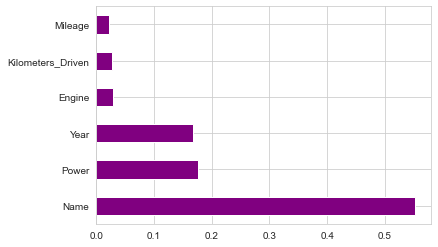

In [181]:
#Decision Tree
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=120)
    model.fit(x_train, y_train)
    importances = model.feature_importances_
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances',ascending=False)
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh',color='purple')  
    return final_df
X_train = df[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]
Y_train = df[['Price']]
feature_importance=tree_based_feature_importance(X_train,Y_train)

In [356]:
X_train = df[['Name','Mileage','Transmission','Power','Location']]
Y_train = df[['Price']]
X_validation = validation[['Name','Mileage','Transmission','Power','Location']]
Y_validation = validation[['Price']]


In [357]:
validation[validation['Power'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [358]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(Y_train)
X_train = scalerX.transform(X_train)
Y_train = scalery.transform(Y_train)
X_validation = scalerX.transform(X_validation)
Y_validation = scalery.transform(Y_validation)

In [359]:
R2=list()
mse=list()
abse=list()
rm=list()
method=list()
R2_train=list()
mse_train=list()
abse_train=list()
rm_train=list()
method_train=list()

In [360]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train, Y_train)
#lin_model = model_fit(LinearRegression,X_validation, Y_validation)
y_predict = model.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("Linear Regression")

y_predict = model.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_predict)))
r2 = r2_score(Y_validation, y_predict)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_predict))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_predict)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_predict))
abse.append(mean_absolute_error(Y_validation, y_predict))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_predict)))
method.append("Linear Regression")
y_predicted_val_linear = y_predict

R2 score is 0.6541861502109692
Mean Absolute Error: 0.4022608352241172
Mean Squared Error: 0.8191408640783188
Root Mean Squared Error: 0.9050640110391743


In [361]:
from sklearn.svm import SVR
svmregressor = SVR(kernel = 'linear',gamma=1)
svmregressor.fit(X_train, Y_train)
y_predict = svmregressor.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("SVM Regression")

y_pred = svmregressor.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("SVM Regression")
y_predicted_val = y_pred

R2 score is 0.6889624476573027
Mean Absolute Error: 0.3777570002651121
Mean Squared Error: 0.7367650819718096
Root Mean Squared Error: 0.8583502093969626


In [362]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,Y_train)
y_predict = clf.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("Decision Tree Regression")


y_pred = clf.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("Decision Tree Regression")

R2 score is 0.2523218603177627
Mean Absolute Error: 0.39961924116320363
Mean Squared Error: 1.771050285479933
Root Mean Squared Error: 1.330808132481889


In [363]:
import xgboost as xgb
clf = xgb.XGBRegressor()
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("XGBoost Regression")


predicted = clf.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("XGBoost Regression")

R2 score is 0.2523218603177627
Mean Absolute Error: 0.39961924116320363
Mean Squared Error: 1.771050285479933
Root Mean Squared Error: 1.330808132481889


In [364]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("Gradient Boosting Regression")

y_pred = clf.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("Gradient Boosting Regression")

R2 score is 0.3028327739916261
Mean Absolute Error: 0.3662982244633806
Mean Squared Error: 1.6514033901996095
Root Mean Squared Error: 1.2850694106543854


In [365]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)
y_predict = rf.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("Random Forest Regression")

y_pred = rf.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("Random Forest Regression")

R2 score is 0.3199205971207173
Mean Absolute Error: 0.35220745120609676
Mean Squared Error: 1.6109268904535161
Root Mean Squared Error: 1.269222947497214


In [366]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_train)
R2_train.append(r2)
mse_train.append(mean_squared_error(Y_train, y_predict))
abse_train.append(mean_absolute_error(Y_train, y_predict))
rm_train.append(np.sqrt(mean_squared_error(Y_train, y_predict)))
method_train.append("Ridge Regression")

y_pred = clf.predict(X_validation)
rmse = (np.sqrt(mean_squared_error(Y_validation, y_pred)))
r2 = r2_score(Y_validation, y_pred)
print('R2 score is {}'.format(r2))
print('Mean Absolute Error:', mean_absolute_error(Y_validation, y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_validation, y_pred)))
R2.append(r2)
mse.append(mean_squared_error(Y_validation, y_pred))
abse.append(mean_absolute_error(Y_validation, y_pred))
rm.append(np.sqrt(mean_squared_error(Y_validation, y_pred)))
method.append("Ridge Regression")

R2 score is 0.6521330912257381
Mean Absolute Error: 0.4027123350600151
Mean Squared Error: 0.8240040137531854
Root Mean Squared Error: 0.9077466682688433


In [367]:
errors=pd.DataFrame()
errors={'Algorithm':method,'Mean_Abs_Error':abse,'MSE':mse, 'RMSE':rm, 'R2':R2}
errors = pd.DataFrame(errors)
errors.sort_values(by='R2', ascending=False,inplace=True)
errors

,Algorithm,Mean_Abs_Error,MSE,RMSE,R2
1,SVM Regression,0.377757,0.736765,0.858350,0.688962
0,Linear Regression,0.402261,0.819141,0.905064,0.654186
6,Ridge Regression,0.402712,0.824004,0.907747,0.652133
5,Random Forest Regression,0.352207,1.610927,1.269223,0.319921
4,Gradient Boosting Regression,0.366298,1.651403,1.285069,0.302833
2,Decision Tree Regression,0.399619,1.771050,1.330808,0.252322
3,XGBoost Regression,0.399619,1.771050,1.330808,0.252322


In [368]:
errors_train=pd.DataFrame()
errors_train={'Algorithm':method_train,'Mean_Abs_Error':abse_train,'MSE':mse_train, 'RMSE':rm_train, 'R2':R2_train}
errors_train = pd.DataFrame(errors_train)
errors_train.sort_values(by='R2', ascending=False,inplace=True)
errors_train

,Algorithm,Mean_Abs_Error,MSE,RMSE,R2
2,Decision Tree Regression,0.054503,0.020733,0.143990,0.688962
1,SVM Regression,0.307700,0.355767,0.596462,0.654186
0,Linear Regression,0.327177,0.333136,0.577179,0.652133
6,Ridge Regression,0.327162,0.333136,0.577179,0.319921
5,Random Forest Regression,0.100188,0.039682,0.199204,0.302833
3,XGBoost Regression,0.098944,0.029958,0.173085,0.252322
4,Gradient Boosting Regression,0.137477,0.052388,0.228883,0.252322


In [372]:
y_plot = scalery.inverse_transform(y_predicted_val)
predict_a_top = pd.DataFrame()
predict_a_top['Actual'] = validation['Price']
predict_a_top['Predicted'] = y_plot
predict_a_top
#display(y_plot)

,Actual,Predicted
0,6.25,7.446363
1,5.45,6.747071
2,52.50,30.902947
3,5.60,7.725597
4,6.45,5.371927
...,...,...
2013,4.75,5.442709
2014,4.00,3.766454
2015,2.90,6.080148
2016,2.65,1.772059


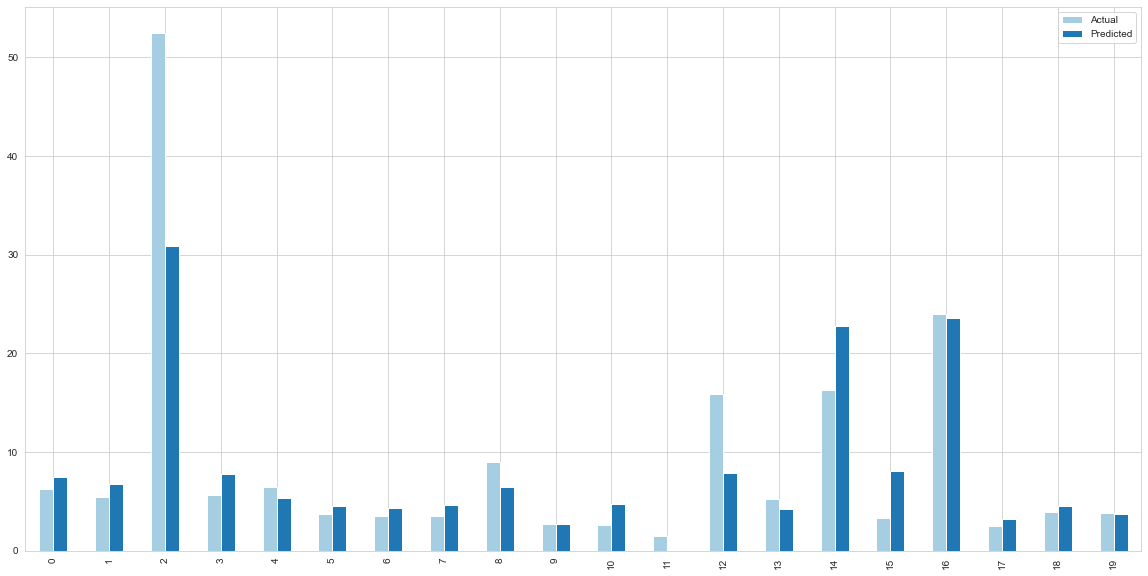

In [373]:
sns.set_palette('Paired')
x = predict_a_top.head(20)
x.plot(kind='bar',figsize=(20,10))
plt.show() 

In [374]:
X_train = df[['Name','Mileage','Transmission','Power','Location']]
Y_train = df[['Price']]
X_test = test[['Name','Mileage','Transmission','Power','Location']]
#'Name','Mileage','Transmission','Power','Location'

In [375]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(Y_train)
X_train = scalerX.transform(X_train)
Y_train = scalery.transform(Y_train)
X_test = scalerX.transform(X_test)

In [378]:
from sklearn.svm import SVR
svmregressor = SVR(kernel = 'linear',gamma=1)
svmregressor.fit(X_train, Y_train)
y_pred = svmregressor.predict(X_test)
y_pred = scalery.inverse_transform(y_pred)

In [380]:
#y_pred_new = scalery.inverse_transform(y_pred)
test['Price']= y_pred
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,4.602748,9.454735,1970.000000,10.619619,3.449024,0.000000,9.927960,32.26,6.906755,4.080922,19.022239,4.840305
1,4.602748,15.408836,1970.000000,10.905846,5.708215,0.000000,7.716449,24.7,6.680855,3.877432,8.600339,3.740196
2,12.051165,9.771058,1970.000000,10.434145,12.681076,0.000000,9.927960,13.68,7.780721,5.002603,14.614542,11.347387
3,9.550000,9.550000,112.838533,4.734781,112.838533,112.838533,112.838533,112.838533,4.734781,4.734781,9.550000,161.612253
4,5.347049,9.771058,1970.000000,10.275086,5.708215,0.000000,9.927960,18.5,7.088409,4.429029,8.600339,4.563044
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,5.427806,9.301300,1970.000000,11.401010,12.681076,0.000000,9.927960,20.54,7.377134,4.650144,8.600339,6.255638
1230,5.427806,9.771058,1970.000000,10.985310,5.708215,1.000000,9.927960,17.21,7.088409,4.650144,8.600339,6.849338
1231,4.722131,5.937167,1970.000000,10.239996,12.681076,0.000000,9.927960,23.08,7.287561,4.160444,8.600339,2.382685
1232,5.427806,7.123434,1970.000000,10.864044,5.708215,1.000000,3.996951,17.2,7.088409,4.650144,8.600339,6.064195


In [381]:
test_big['Price'] = y_pred
test_big

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,4.840305
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.740196
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,11.347387
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,161.612253
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,4.563044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,6.255638
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,6.849338
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,2.382685
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,6.064195


In [382]:
test_big.to_csv('Final_Price.csv')

### Final Results :

I chose <B>SVM Regressor</B> model with an R2 score of <b>68.89%</b> on Validation set & <b>65.41%</b> on Train set.